In [ ]:
import pandas as pd
train = pd.read_csv('/content/drive/MyDrive/seoul/train.csv')
sub = pd.read_csv('/content/drive/MyDrive/seoul/sample_submission.csv')
sol = pd.read_csv('/content/drive/MyDrive/seoul/test.csv',encoding = 'cp949')

In [ ]:
train['일시'] = pd.to_datetime(train['일시'])
train.info()
# 일사합 : 년간 일사량(태양의 복사 에너지가 땅에 닿는 양)의 합계
# 일조합 : 년간 일사시간(구름이나 안개 따위에 가려지지 아니하고 햇볕이 실제로 내리쬐는 시간)의 합계
# 일조율 : 일조시간과 가조시간과의 비로, 1에 가까울수록 구름이 적은 경우가 된다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23011 entries, 0 to 23010
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   일시      23011 non-null  datetime64[ns]
 1   최고기온    23008 non-null  float64       
 2   최저기온    23008 non-null  float64       
 3   일교차     23007 non-null  float64       
 4   강수량     9150 non-null   float64       
 5   평균습도    23011 non-null  float64       
 6   평균풍속    23007 non-null  float64       
 7   일조합     22893 non-null  float64       
 8   일사합     18149 non-null  float64       
 9   일조율     22645 non-null  float64       
 10  평균기온    23011 non-null  float64       
dtypes: datetime64[ns](1), float64(10)
memory usage: 1.9 MB


In [ ]:
train.isnull().sum()

일시          0
최고기온        3
최저기온        3
일교차         4
강수량     13861
평균습도        0
평균풍속        4
일조합       118
일사합      4862
일조율       366
평균기온        0
dtype: int64

In [ ]:
a = train[(train['일시'].dt.month == 7) & (train['일시'].dt.year == 2000)]
a

,일시,최고기온,최저기온,일교차,강수량,평균습도,평균풍속,일조합,일사합,일조율,평균기온
14792,2000-07-01,31.0,19.9,11.1,NaN,69.3,1.4,2.7,14.22,18.4,25.6
14793,2000-07-02,33.0,24.1,8.9,NaN,73.4,1.8,5.1,16.60,34.7,27.2
14794,2000-07-03,33.2,23.2,10.0,NaN,69.9,1.8,8.5,21.48,57.8,28.1
14795,2000-07-04,33.8,23.2,10.6,0.1,68.8,1.2,5.4,16.20,36.7,28.2
14796,2000-07-05,33.9,22.8,11.1,NaN,68.6,1.7,6.5,16.61,44.2,28.4
14797,2000-07-06,34.2,23.8,10.4,NaN,67.8,2.1,10.0,21.36,68.0,29.0
14798,2000-07-07,33.4,24.2,9.2,NaN,62.3,2.1,6.8,19.14,46.6,27.8
14799,2000-07-08,33.0,22.1,10.9,NaN,52.4,2.0,6.9,18.84,47.3,27.0
14800,2000-07-09,30.5,22.7,7.8,NaN,67.3,2.1,6.1,17.32,41.8,26.8
14801,2000-07-10,34.0,22.8,11.2,0.0,60.9,1.1,5.6,16.03,38.4,28.7


In [ ]:
a.corr()

<ipython-input-6-210c353a220b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  a.corr()


,최고기온,최저기온,일교차,강수량,평균습도,평균풍속,일조합,일사합,일조율,평균기온
최고기온,1.000000,0.254957,0.735081,-0.618774,-0.764875,-0.356740,0.710814,0.750599,0.706989,0.855663
최저기온,0.254957,1.000000,-0.468160,0.017115,0.063334,0.000810,-0.208615,-0.180382,-0.213496,0.621340
일교차,0.735081,-0.468160,1.000000,-0.600477,-0.743383,-0.326573,0.795844,0.812406,0.795771,0.346290
강수량,-0.618774,0.017115,-0.600477,1.000000,0.726213,0.438867,-0.454960,-0.717732,-0.453789,-0.451971
평균습도,-0.764875,0.063334,-0.743383,0.726213,1.000000,0.542727,-0.717342,-0.782186,-0.718800,-0.565570
평균풍속,-0.356740,0.000810,-0.326573,0.438867,0.542727,1.000000,-0.283801,-0.312171,-0.287733,-0.318769
일조합,0.710814,-0.208615,0.795844,-0.454960,-0.717342,-0.283801,1.000000,0.937131,0.999756,0.470685
일사합,0.750599,-0.180382,0.812406,-0.717732,-0.782186,-0.312171,0.937131,1.000000,0.937199,0.499140
일조율,0.706989,-0.213496,0.795771,-0.453789,-0.718800,-0.287733,0.999756,0.937199,1.000000,0.465103
평균기온,0.855663,0.621340,0.346290,-0.451971,-0.565570,-0.318769,0.470685,0.499140,0.465103,1.000000


<Axes: >

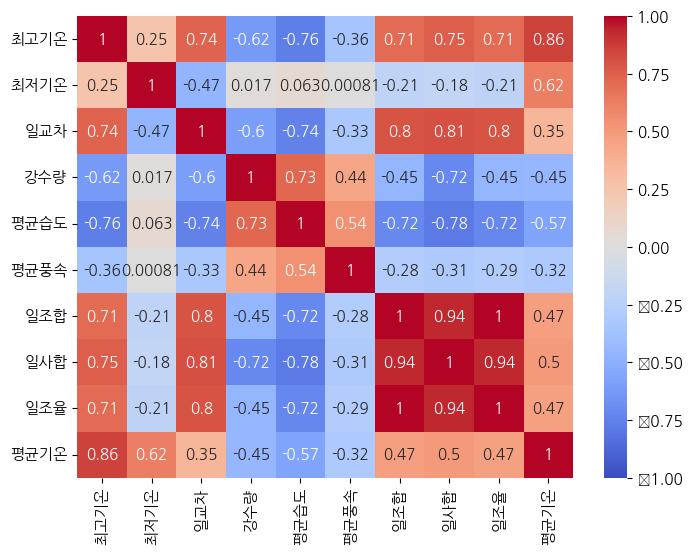

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import matplotlib.font_manager as fm

warnings.filterwarnings('ignore')
!apt-get -qq install fonts-nanum


fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
    name='NanumGothic')
fm.fontManager.ttflist.insert(0, fe)
plt.rcParams.update({'font.size': 11, 'font.family': 'NanumGothic'})

correlation_matrix = a.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

In [ ]:
!pip install Prophet

In [ ]:
from prophet import Prophet
train['일시'] = pd.to_datetime(train['일시'])
simple = train[['일시','평균기온']]
simple.rename(columns={'일시': 'ds','평균기온': 'y'}, inplace=True)

m = Prophet()
m.fit(simple)

<ipython-input-5-ae0dd7f69e04>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  simple.rename(columns={'일시': 'ds','평균기온': 'y'}, inplace=True)
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsyt7mns5/qou7mvwg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsyt7mns5/ztlx8qfd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9140', 'data', 'file=/tmp/tmpsyt7mns5/qou7mvwg.json', 'init=/tmp/tmpsyt7mns5/ztlx8qfd.json', 'output', 'file=/tmp/tmpsyt7mns5/prophet_model13w0fu2h/prophet_model-20231214082743.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:27:43 -

In [ ]:
future = m.make_future_dataframe(periods=346)
forecast = m.predict(future)

In [ ]:
pred = forecast[forecast['ds'].dt.year == 2023]['yhat'].reset_index(drop=True)
pred

0     -1.061637
1     -1.163262
2     -1.279313
3     -1.344326
4     -1.382818
         ...   
341    2.419418
342    2.292222
343    2.044595
344    1.847732
345    1.636581
Name: yhat, Length: 346, dtype: float64

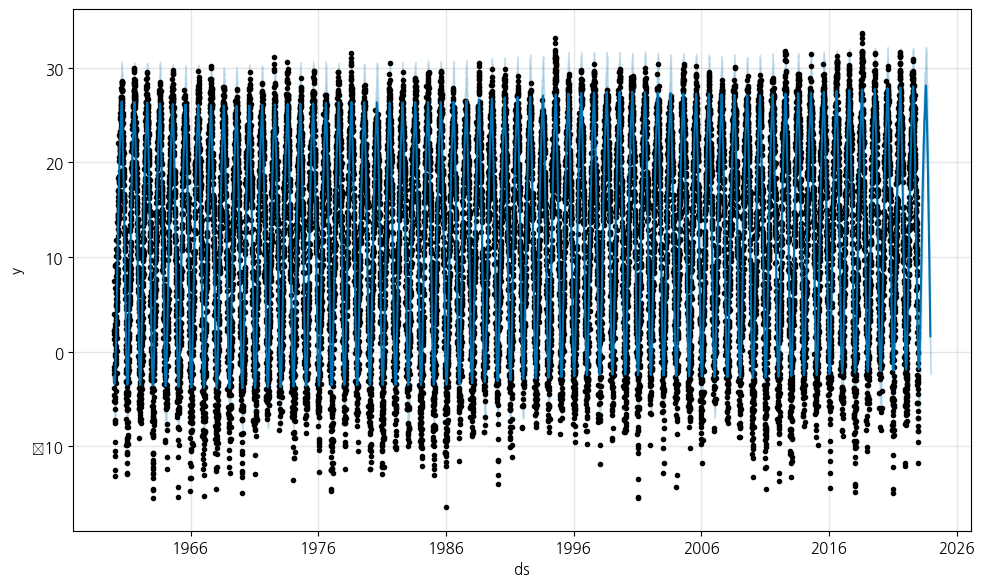

In [ ]:
fig1 = m.plot(forecast)

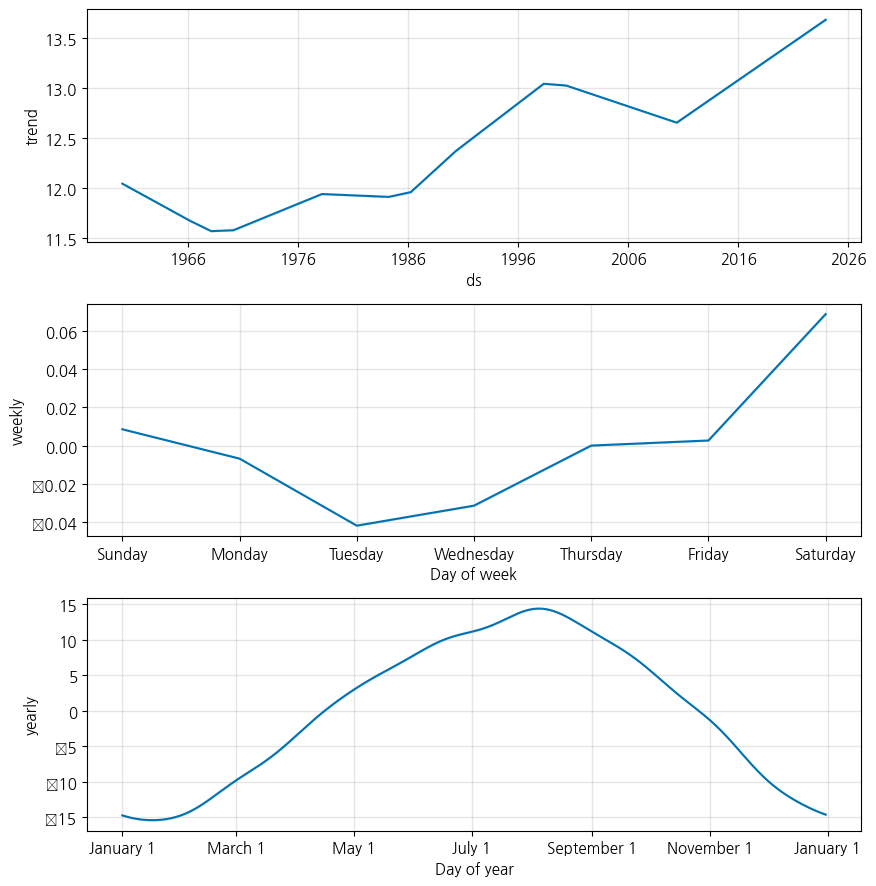

In [ ]:
fig2 = m.plot_components(forecast)

In [ ]:
train['YearMonth'] = train['일시'].dt.to_period("Y")
monthly_avg = train.groupby('YearMonth')['평균기온'].mean()
monthly_avg

YearMonth
1960    12.104645
1961    12.454521
1962    11.756986
1963    11.312877
1964    12.221038
          ...    
2018    13.002466
2019    13.598904
2020    13.271858
2021    13.752055
2022    13.296164
Freq: A-DEC, Name: 평균기온, Length: 63, dtype: float64

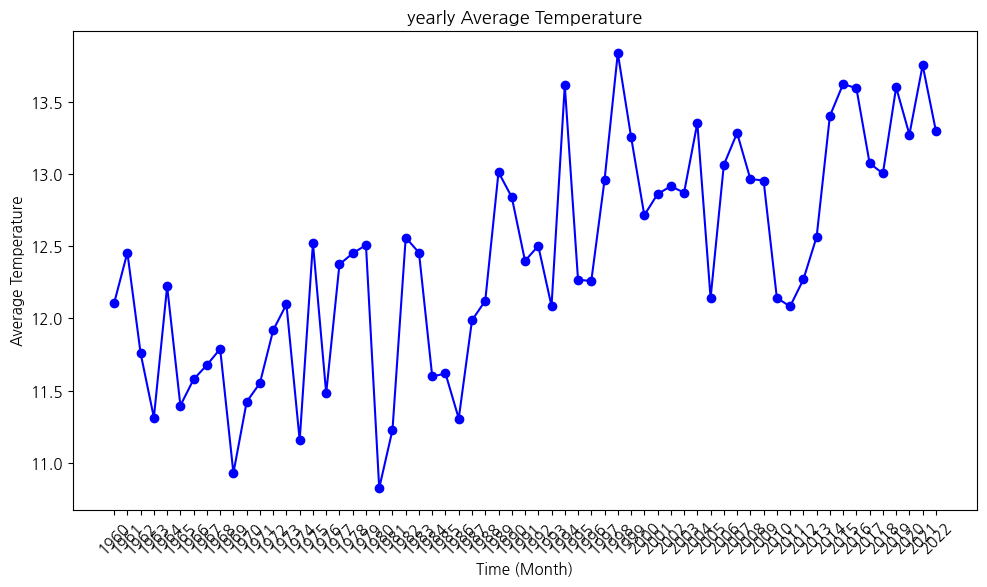

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(monthly_avg.index.astype(str), monthly_avg.values, marker='o', linestyle='-', color='b')

# Set labels and title
plt.xlabel('Time (Month)')
plt.ylabel('Average Temperature')
plt.title('yearly Average Temperature')

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
pip install 'pystan<2.18' fbprophet

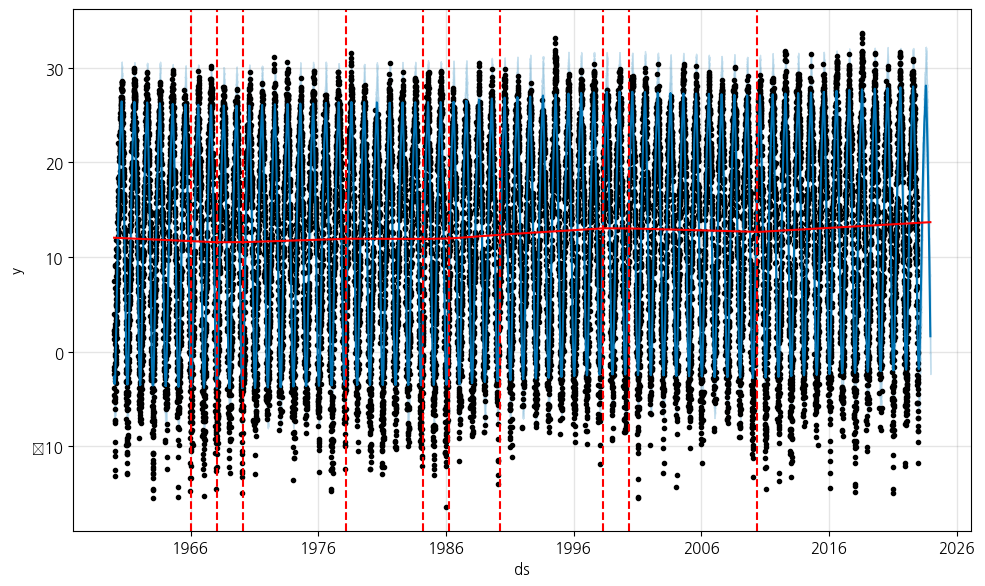

In [ ]:
from prophet.plot import add_changepoints_to_plot

fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

#Test

###1. base  
    2.506711787280654

###2. change_point = 0.3(0.05) , yearly seasonality = 20(10)
    2.484499364875941
###3. change_point = 0.3(0.05) , yearly seasonality = 20(10), monthly
    2.4850544400864285

In [ ]:
#base
from prophet import Prophet
train['일시'] = pd.to_datetime(train['일시'])
simple = train[['일시','평균기온']]
simple.rename(columns={'일시': 'ds','평균기온': 'y'}, inplace=True)

m = Prophet()
m.fit(simple)

In [ ]:
future = m.make_future_dataframe(periods=346)
forecast = m.predict(future)

In [ ]:
pred = forecast[forecast['ds'].dt.year == 2023]['yhat'].reset_index(drop=True)
pred

In [ ]:
sol['pred'] = pred

In [ ]:
sol['eval'] = abs(sol['평균기온(℃)'] - sol['pred'])

In [ ]:
sol['eval'].mean()

2.506711787280654

In [ ]:
# change_point = 0.3(0.05) , yearly seasonality = 20(10)
from prophet import Prophet
train['일시'] = pd.to_datetime(train['일시'])
simple = train[['일시','평균기온']]
simple.rename(columns={'일시': 'ds','평균기온': 'y'}, inplace=True)

m = Prophet(changepoint_prior_scale=0.3,yearly_seasonality=20)
m.fit(simple)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx11n5hz0/ufe20n_w.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx11n5hz0/0bz75ogx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85502', 'data', 'file=/tmp/tmpx11n5hz0/ufe20n_w.json', 'init=/tmp/tmpx11n5hz0/0bz75ogx.json', 'output', 'file=/tmp/tmpx11n5hz0/prophet_modelgo6pamkv/prophet_model-20231213110315.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:03:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:03:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future = m.make_future_dataframe(periods=346)
forecast = m.predict(future)

pred = forecast[forecast['ds'].dt.year == 2023]['yhat'].reset_index(drop=True)
sol['pred'] = pred

sol['eval'] = abs(sol['평균기온(℃)'] - sol['pred'])
sol['eval'].mean()

2.484499364875941

In [ ]:
# change_point = 0.3(0.05) , yearly seasonality = 20(10), monthly
from prophet import Prophet
train['일시'] = pd.to_datetime(train['일시'])
simple = train[['일시','평균기온']]
simple.rename(columns={'일시': 'ds','평균기온': 'y'}, inplace=True)

m = Prophet(changepoint_prior_scale=0.3,yearly_seasonality=20)
m.add_seasonality(name='monthly', period=30.5, fourier_order=5)

m.fit(simple)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx11n5hz0/cf1qb09k.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx11n5hz0/0h2du5hg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26628', 'data', 'file=/tmp/tmpx11n5hz0/cf1qb09k.json', 'init=/tmp/tmpx11n5hz0/0h2du5hg.json', 'output', 'file=/tmp/tmpx11n5hz0/prophet_models6u_35rq/prophet_model-20231213110601.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:06:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:06:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future = m.make_future_dataframe(periods=346)
forecast = m.predict(future)

pred = forecast[forecast['ds'].dt.year == 2023]['yhat'].reset_index(drop=True)
sol['pred'] = pred

sol['eval'] = abs(sol['평균기온(℃)'] - sol['pred'])
sol['eval'].mean()

2.4850544400864285

In [ ]:
# change_point = 0.3(0.05) , yearly seasonality = 15(10)
from prophet import Prophet
train['일시'] = pd.to_datetime(train['일시'])
simple = train[['일시','평균기온']]
simple.rename(columns={'일시': 'ds','평균기온': 'y'}, inplace=True)

m = Prophet(changepoint_prior_scale=0.3,yearly_seasonality=15)
m.fit(simple)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx11n5hz0/cvzzhv0k.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx11n5hz0/lb86ym78.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72234', 'data', 'file=/tmp/tmpx11n5hz0/cvzzhv0k.json', 'init=/tmp/tmpx11n5hz0/lb86ym78.json', 'output', 'file=/tmp/tmpx11n5hz0/prophet_modelpkl2bnt6/prophet_model-20231213110946.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:09:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:09:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future = m.make_future_dataframe(periods=346)
forecast = m.predict(future)

pred = forecast[forecast['ds'].dt.year == 2023]['yhat'].reset_index(drop=True)
sol['pred'] = pred

sol['eval'] = abs(sol['평균기온(℃)'] - sol['pred'])
sol['eval'].mean()

2.4763338652941047

#Best

In [ ]:
# change_point = 0.4(0.05) , yearly seasonality = 15(10)
from prophet import Prophet
train['일시'] = pd.to_datetime(train['일시'])
simple = train[['일시','평균기온']]
simple.rename(columns={'일시': 'ds','평균기온': 'y'}, inplace=True)

m = Prophet(changepoint_prior_scale=0.4,yearly_seasonality=15)
m.fit(simple)

future = m.make_future_dataframe(periods=346)
forecast = m.predict(future)

pred = forecast[forecast['ds'].dt.year == 2023]['yhat'].reset_index(drop=True)
sol['pred'] = pred

sol['eval'] = abs(sol['평균기온(℃)'] - sol['pred'])
sol['eval'].mean()

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx11n5hz0/yame2992.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx11n5hz0/6yxpz0f3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92622', 'data', 'file=/tmp/tmpx11n5hz0/yame2992.json', 'init=/tmp/tmpx11n5hz0/6yxpz0f3.json', 'output', 'file=/tmp/tmpx11n5hz0/prophet_modeljjn7ngrm/prophet_model-20231213112412.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:24:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:24:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


2.473070451482932

In [ ]:
# change_point = 0.5(0.05) , yearly seasonality = 15(10)
from prophet import Prophet
train['일시'] = pd.to_datetime(train['일시'])
simple = train[['일시','평균기온']]
simple.rename(columns={'일시': 'ds','평균기온': 'y'}, inplace=True)

m = Prophet(changepoint_prior_scale=0.5,yearly_seasonality=15)
m.fit(simple)

future = m.make_future_dataframe(periods=346)
forecast = m.predict(future)

pred = forecast[forecast['ds'].dt.year == 2023]['yhat'].reset_index(drop=True)
sol['pred'] = pred

sol['eval'] = abs(sol['평균기온(℃)'] - sol['pred'])
sol['eval'].mean()

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx11n5hz0/5_m2ftvv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx11n5hz0/n781678r.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91180', 'data', 'file=/tmp/tmpx11n5hz0/5_m2ftvv.json', 'init=/tmp/tmpx11n5hz0/n781678r.json', 'output', 'file=/tmp/tmpx11n5hz0/prophet_model_6icakh2/prophet_model-20231213112614.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:26:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:26:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


2.473930960509543

In [ ]:
import numpy as np
changepoint_range = [round(x, 2) for x in list(np.arange(0.05, 0.51, 0.01))]
yearly_seasonality_range = list(range(10, 11)) #10~20

# Initialize variables to store the best parameters and evaluation metric
best_changepoint = None
best_yearly_seasonality = None
best_eval_mean = float('inf')  # Initialize with a large value

# Nested loops for parameter tuning
for changepoint_value in changepoint_range:
    for yearly_seasonality_value in yearly_seasonality_range:
        # Create and fit the model with current parameter values
        m = Prophet(changepoint_prior_scale=changepoint_value, yearly_seasonality=yearly_seasonality_value)
        m.fit(simple)

        # Make future dataframe and predict
        future = m.make_future_dataframe(periods=346)
        forecast = m.predict(future)

        # Extract and evaluate predictions for the year 2023
        pred = forecast[forecast['ds'].dt.year == 2023]['yhat'].reset_index(drop=True)
        sol['pred'] = pred
        sol['eval'] = abs(sol['평균기온(℃)'] - sol['pred'])
        eval_mean = sol['eval'].mean()

        # Update best parameters if the current combination is better
        if eval_mean < best_eval_mean:
            best_eval_mean = eval_mean
            best_changepoint = changepoint_value
            best_yearly_seasonality = yearly_seasonality_value

# Print the best parameters and their corresponding evaluation metric
print(f"Best Changepoint: {best_changepoint}")
print(f"Best Yearly Seasonality: {best_yearly_seasonality}")
print(f"Best Mean Evaluation: {best_eval_mean}")

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx11n5hz0/eyay_xkc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx11n5hz0/osy3ejbt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17281', 'data', 'file=/tmp/tmpx11n5hz0/eyay_xkc.json', 'init=/tmp/tmpx11n5hz0/osy3ejbt.json', 'output', 'file=/tmp/tmpx11n5hz0/prophet_modelrhr3nez0/prophet_model-20231213113645.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:36:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:36:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx1

Best Changepoint: 0.41
Best Yearly Seasonality: 10
Best Mean Evaluation: 2.4735695273935


In [ ]:
import numpy as np
changepoint_range = [round(x, 2) for x in list(np.arange(0.05, 0.51, 0.01))]
yearly_seasonality_range = list(range(11, 12)) #10~20

# Initialize variables to store the best parameters and evaluation metric
best_changepoint = None
best_yearly_seasonality = None
best_eval_mean = float('inf')  # Initialize with a large value

# Nested loops for parameter tuning
for changepoint_value in changepoint_range:
    for yearly_seasonality_value in yearly_seasonality_range:
        # Create and fit the model with current parameter values
        m = Prophet(changepoint_prior_scale=changepoint_value, yearly_seasonality=yearly_seasonality_value)
        m.fit(simple)

        # Make future dataframe and predict
        future = m.make_future_dataframe(periods=346)
        forecast = m.predict(future)

        # Extract and evaluate predictions for the year 2023
        pred = forecast[forecast['ds'].dt.year == 2023]['yhat'].reset_index(drop=True)
        sol['pred'] = pred
        sol['eval'] = abs(sol['평균기온(℃)'] - sol['pred'])
        eval_mean = sol['eval'].mean()

        # Update best parameters if the current combination is better
        if eval_mean < best_eval_mean:
            best_eval_mean = eval_mean
            best_changepoint = changepoint_value
            best_yearly_seasonality = yearly_seasonality_value

# Print the best parameters and their corresponding evaluation metric
print(f"Best Changepoint: {best_changepoint}")
print(f"Best Yearly Seasonality: {best_yearly_seasonality}")
print(f"Best Mean Evaluation: {best_eval_mean}")

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx11n5hz0/3grp_b37.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx11n5hz0/z53z5or_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37170', 'data', 'file=/tmp/tmpx11n5hz0/3grp_b37.json', 'init=/tmp/tmpx11n5hz0/z53z5or_.json', 'output', 'file=/tmp/tmpx11n5hz0/prophet_modelocq2w3ip/prophet_model-20231213115745.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:57:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:57:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx1

Best Changepoint: 0.47
Best Yearly Seasonality: 11
Best Mean Evaluation: 2.4683038370016788


In [ ]:
import numpy as np
changepoint_range = [round(x, 2) for x in list(np.arange(0.05, 0.51, 0.01))]
yearly_seasonality_range = list(range(12, 13)) #10~20

# Initialize variables to store the best parameters and evaluation metric
best_changepoint = None
best_yearly_seasonality = None
best_eval_mean = float('inf')  # Initialize with a large value

# Nested loops for parameter tuning
for changepoint_value in changepoint_range:
    for yearly_seasonality_value in yearly_seasonality_range:
        # Create and fit the model with current parameter values
        m = Prophet(changepoint_prior_scale=changepoint_value, yearly_seasonality=yearly_seasonality_value)
        m.fit(simple)

        # Make future dataframe and predict
        future = m.make_future_dataframe(periods=346)
        forecast = m.predict(future)

        # Extract and evaluate predictions for the year 2023
        pred = forecast[forecast['ds'].dt.year == 2023]['yhat'].reset_index(drop=True)
        sol['pred'] = pred
        sol['eval'] = abs(sol['평균기온(℃)'] - sol['pred'])
        eval_mean = sol['eval'].mean()

        # Update best parameters if the current combination is better
        if eval_mean < best_eval_mean:
            best_eval_mean = eval_mean
            best_changepoint = changepoint_value
            best_yearly_seasonality = yearly_seasonality_value

# Print the best parameters and their corresponding evaluation metric
print(f"Best Changepoint: {best_changepoint}")
print(f"Best Yearly Seasonality: {best_yearly_seasonality}")
print(f"Best Mean Evaluation: {best_eval_mean}")

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx11n5hz0/wsb67oma.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx11n5hz0/wynb_pfd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8993', 'data', 'file=/tmp/tmpx11n5hz0/wsb67oma.json', 'init=/tmp/tmpx11n5hz0/wynb_pfd.json', 'output', 'file=/tmp/tmpx11n5hz0/prophet_modelqkgs13q5/prophet_model-20231213121633.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:16:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:16:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx11

Best Changepoint: 0.43
Best Yearly Seasonality: 12
Best Mean Evaluation: 2.464926549896631


In [ ]:
import numpy as np
changepoint_range = [round(x, 2) for x in list(np.arange(0.05, 0.51, 0.01))]
yearly_seasonality_range = list(range(13, 17)) #10~20

# Initialize variables to store the best parameters and evaluation metric
best_changepoint = None
best_yearly_seasonality = None
best_eval_mean = float('inf')  # Initialize with a large value

# Nested loops for parameter tuning
for changepoint_value in changepoint_range:
    for yearly_seasonality_value in yearly_seasonality_range:
        # Create and fit the model with current parameter values
        m = Prophet(changepoint_prior_scale=changepoint_value, yearly_seasonality=yearly_seasonality_value)
        m.fit(simple)

        # Make future dataframe and predict
        future = m.make_future_dataframe(periods=346)
        forecast = m.predict(future)

        # Extract and evaluate predictions for the year 2023
        pred = forecast[forecast['ds'].dt.year == 2023]['yhat'].reset_index(drop=True)
        sol['pred'] = pred
        sol['eval'] = abs(sol['평균기온(℃)'] - sol['pred'])
        eval_mean = sol['eval'].mean()

        # Update best parameters if the current combination is better
        if eval_mean < best_eval_mean:
            best_eval_mean = eval_mean
            best_changepoint = changepoint_value
            best_yearly_seasonality = yearly_seasonality_value

# Print the best parameters and their corresponding evaluation metric
print(f"Best Changepoint: {best_changepoint}")
print(f"Best Yearly Seasonality: {best_yearly_seasonality}")
print(f"Best Mean Evaluation: {best_eval_mean}")

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx11n5hz0/g027fpb1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx11n5hz0/32hafk_4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93631', 'data', 'file=/tmp/tmpx11n5hz0/g027fpb1.json', 'init=/tmp/tmpx11n5hz0/32hafk_4.json', 'output', 'file=/tmp/tmpx11n5hz0/prophet_modelcmv6la4i/prophet_model-20231213130458.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:04:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:05:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx1

Best Changepoint: 0.46
Best Yearly Seasonality: 13
Best Mean Evaluation: 2.465958045601647


In [ ]:
import numpy as np
changepoint_range = [round(x, 2) for x in list(np.arange(0.05, 0.51, 0.01))]
yearly_seasonality_range = list(range(17, 21)) #10~20

# Initialize variables to store the best parameters and evaluation metric
best_changepoint = None
best_yearly_seasonality = None
best_eval_mean = float('inf')  # Initialize with a large value

# Nested loops for parameter tuning
for changepoint_value in changepoint_range:
    for yearly_seasonality_value in yearly_seasonality_range:
        # Create and fit the model with current parameter values
        m = Prophet(changepoint_prior_scale=changepoint_value, yearly_seasonality=yearly_seasonality_value)
        m.fit(simple)

        # Make future dataframe and predict
        future = m.make_future_dataframe(periods=346)
        forecast = m.predict(future)

        # Extract and evaluate predictions for the year 2023
        pred = forecast[forecast['ds'].dt.year == 2023]['yhat'].reset_index(drop=True)
        sol['pred'] = pred
        sol['eval'] = abs(sol['평균기온(℃)'] - sol['pred'])
        eval_mean = sol['eval'].mean()

        # Update best parameters if the current combination is better
        if eval_mean < best_eval_mean:
            best_eval_mean = eval_mean
            best_changepoint = changepoint_value
            best_yearly_seasonality = yearly_seasonality_value

# Print the best parameters and their corresponding evaluation metric
print(f"Best Changepoint: {best_changepoint}")
print(f"Best Yearly Seasonality: {best_yearly_seasonality}")
print(f"Best Mean Evaluation: {best_eval_mean}")

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsyt7mns5/xahba0d0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsyt7mns5/zes4kvev.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93237', 'data', 'file=/tmp/tmpsyt7mns5/xahba0d0.json', 'init=/tmp/tmpsyt7mns5/zes4kvev.json', 'output', 'file=/tmp/tmpsyt7mns5/prophet_model1dtg_0xa/prophet_model-20231214082754.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:27:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:28:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsy

Best Changepoint: 0.45
Best Yearly Seasonality: 18
Best Mean Evaluation: 2.4706637930357993


In [ ]:
# change_point = 0.43(0.05) , yearly seasonality = 12(10)
from prophet import Prophet
train['일시'] = pd.to_datetime(train['일시'])
simple = train[['일시','평균기온']]
simple.rename(columns={'일시': 'ds','평균기온': 'y'}, inplace=True)

m = Prophet(changepoint_prior_scale=0.43,yearly_seasonality=12)
m.fit(simple)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx11n5hz0/jqsowpzv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx11n5hz0/wigc_87s.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2872', 'data', 'file=/tmp/tmpx11n5hz0/jqsowpzv.json', 'init=/tmp/tmpx11n5hz0/wigc_87s.json', 'output', 'file=/tmp/tmpx11n5hz0/prophet_model14kbmzrb/prophet_model-20231213123903.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:39:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:39:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future = m.make_future_dataframe(periods=358)
forecast = m.predict(future)

In [ ]:
pred = forecast[forecast['ds'].dt.year == 2023]['yhat'].reset_index(drop=True)
pred

0     -1.002381
1     -1.086474
2     -1.181852
3     -1.223843
4     -1.237844
         ...   
353    0.612658
354    0.480749
355    0.323552
356    0.234904
357    0.025676
Name: yhat, Length: 358, dtype: float64

In [ ]:
sub['평균기온'] = pred
sub.head()

,일시,평균기온
0,2023-01-01,-1.002381
1,2023-01-02,-1.086474
2,2023-01-03,-1.181852
3,2023-01-04,-1.223843
4,2023-01-05,-1.237844


In [ ]:
sub.to_csv('prophet_tunning.csv',index=False)

#new col

In [ ]:
# change_point = 0.43(0.05) , yearly seasonality = 12(10)
from prophet import Prophet
#train['일시'] = pd.to_datetime(train['일시'])
simple = train[['일시','평균기온']]
simple.rename(columns={'일시': 'ds','평균기온': 'y'}, inplace=True)

m = Prophet(changepoint_prior_scale=0.43,yearly_seasonality=12)
#m.add_seasonality(name='monthly', period=30.5, fourier_order=5)
m.fit(simple)

<ipython-input-44-19041a4c745c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  simple.rename(columns={'일시': 'ds','평균기온': 'y'}, inplace=True)
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsyt7mns5/k9i3d9jo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsyt7mns5/fkukl766.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8182', 'data', 'file=/tmp/tmpsyt7mns5/k9i3d9jo.json', 'init=/tmp/tmpsyt7mns5/fkukl766.json', 'output', 'file=/tmp/tmpsyt7mns5/prophet_model7nj3h5m7/prophet_model-20231214104915.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:49:15 

In [ ]:
future = m.make_future_dataframe(periods=346)
forecast = m.predict(future)

In [ ]:
sol = pd.read_csv('/content/drive/MyDrive/seoul/test.csv',encoding = 'cp949')

In [ ]:
pred = forecast[forecast['ds'].dt.year == 2023]['yhat'].reset_index(drop=True)
sol['pred'] = pred
sol['eval'] = abs(sol['평균기온(℃)'] - sol['pred'])
sol['eval'].mean()

2.6192474532726306

# 최고기온, 최저기온을 예측

In [ ]:
train['일시'] = pd.to_datetime(train['일시'])

train['month'] = train['일시'].dt.month
train['year'] = train['일시'].dt.year

null_max_temp_rows = train[train['최고기온'].isnull()]

# Iterate through each row with null 'Maximum Temperature' and replace with monthly average
for index, row in null_max_temp_rows.iterrows():
    year = row['year']
    month = row['month']

    # Calculate the monthly average temperature
    monthly_avg_temp = train[(train['year'] == year) & (train['month'] == month)]['평균기온'].mean()

    # Replace null value with monthly average temperature
    train.at[index, '최고기온'] = monthly_avg_temp

# Identify rows with null values in 'Minimum Temperature'
null_min_temp_rows = train[train['최저기온'].isnull()]

# Iterate through each row with null 'Minimum Temperature' and replace with monthly average
for index, row in null_min_temp_rows.iterrows():
    year = row['year']
    month = row['month']

    # Calculate the monthly average temperature
    monthly_avg_temp = train[(train['year'] == year) & (train['month'] == month)]['평균기온'].mean()

    # Replace null value with monthly average temperature
    train.at[index, '최저기온'] = monthly_avg_temp

# Drop the temporary 'month' and 'year' columns
train.drop(['month', 'year'], axis=1, inplace=True)

In [ ]:
train['일교차'] = train['최고기온'] - train['최저기온']

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23011 entries, 0 to 23010
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   일시      23011 non-null  datetime64[ns]
 1   최고기온    23011 non-null  float64       
 2   최저기온    23011 non-null  float64       
 3   일교차     23011 non-null  float64       
 4   강수량     9150 non-null   float64       
 5   평균습도    23011 non-null  float64       
 6   평균풍속    23007 non-null  float64       
 7   일조합     22893 non-null  float64       
 8   일사합     18149 non-null  float64       
 9   일조율     22645 non-null  float64       
 10  평균기온    23011 non-null  float64       
dtypes: datetime64[ns](1), float64(10)
memory usage: 1.9 MB


In [ ]:
# change_point = 0.43(0.05) , yearly seasonality = 12(10)
from prophet import Prophet
train['일시'] = pd.to_datetime(train['일시'])
simple = train[['일시','최고기온']]
simple.rename(columns={'일시': 'ds','최고기온': 'y'}, inplace=True)

m = Prophet(changepoint_prior_scale=0.43,yearly_seasonality=12)
m.fit(simple)

<ipython-input-117-e4284f71f8ee>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  simple.rename(columns={'일시': 'ds','최고기온': 'y'}, inplace=True)
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsyt7mns5/09kkcs1k.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsyt7mns5/qa7jrkm2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75537', 'data', 'file=/tmp/tmpsyt7mns5/09kkcs1k.json', 'init=/tmp/tmpsyt7mns5/qa7jrkm2.json', 'output', 'file=/tmp/tmpsyt7mns5/prophet_modelrvi7sgmn/prophet_model-20231214120327.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:03:2

In [ ]:
future = m.make_future_dataframe(periods=346)
forecast = m.predict(future)

In [ ]:
temp_high = forecast[forecast['ds'].dt.year == 2023]['yhat'].reset_index(drop=True)
temp_high

0      3.428176
1      3.317521
2      3.255970
3      3.184120
4      3.181328
         ...   
341    7.085128
342    6.965915
343    6.748984
344    6.523735
345    6.342661
Name: yhat, Length: 346, dtype: float64

In [ ]:
# change_point = 0.43(0.05) , yearly seasonality = 12(10)
from prophet import Prophet
train['일시'] = pd.to_datetime(train['일시'])
simple = train[['일시','최저기온']]
simple.rename(columns={'일시': 'ds','최저기온': 'y'}, inplace=True)

m = Prophet(changepoint_prior_scale=0.43,yearly_seasonality=12)
m.fit(simple)

<ipython-input-95-a605dfe8b557>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  simple.rename(columns={'일시': 'ds','최저기온': 'y'}, inplace=True)
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsyt7mns5/6c7x6lmr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsyt7mns5/xnia7o9a.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=39820', 'data', 'file=/tmp/tmpsyt7mns5/6c7x6lmr.json', 'init=/tmp/tmpsyt7mns5/xnia7o9a.json', 'output', 'file=/tmp/tmpsyt7mns5/prophet_modelqnk2yoyl/prophet_model-20231214115437.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:54:37

In [ ]:
future = m.make_future_dataframe(periods=346)
forecast = m.predict(future)

temp_low = forecast[forecast['ds'].dt.year == 2023]['yhat'].reset_index(drop=True)
temp_low

0     -4.911237
1     -5.010694
2     -5.113451
3     -5.137192
4     -5.129584
         ...   
341   -1.288653
342   -1.384795
343   -1.620167
344   -1.820240
345   -2.033072
Name: yhat, Length: 346, dtype: float64

In [ ]:
from prophet import Prophet
train['일시'] = pd.to_datetime(train['일시'])
simple = train[['일시','최고기온','최저기온','일교차','평균기온']]
simple.rename(columns={'일시': 'ds','평균기온': 'y', '최고기온':'high', '최저기온':'low', '일교차':'diff'}, inplace=True)

m = Prophet()
m.add_regressor('high')
m.add_regressor('low')
m.add_regressor('diff')
m.fit(simple)

<ipython-input-120-d276e153e8d7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  simple.rename(columns={'일시': 'ds','평균기온': 'y', '최고기온':'high', '최저기온':'low', '일교차':'diff'}, inplace=True)
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsyt7mns5/8w47qf5l.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsyt7mns5/16dbirbb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57883', 'data', 'file=/tmp/tmpsyt7mns5/8w47qf5l.json', 'init=/tmp/tmpsyt7mns5/16dbirbb.json', 'output', 'file=/tmp/tmpsyt7mns5/prophet_modelkg21b_e4/prophet_model-20231214120358.csv', 'method=optimize

In [ ]:
future = m.make_future_dataframe(periods=346)

In [ ]:
# future = m.make_future_dataframe(periods=346)
# future['high'] = temp_high
# future['low'] = temp_low
# future['diff'] = future['high'] - future['low']
forecast = m.predict(future)

In [ ]:
future['high'] = train['최고기온']

In [ ]:
future['high'][-346:] = temp_high

<ipython-input-126-6340e77c5bd4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  future['high'][-346:] = temp_high


In [ ]:
future['low'] = train['최저기온']
future['low'][-346:] = temp_low

<ipython-input-127-62c4f193b23d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  future['low'][-346:] = temp_low


In [ ]:
future['diff'] = future['high'] - future['low']

In [ ]:
pred = forecast[forecast['ds'].dt.year == 2023]['yhat'].reset_index(drop=True)
sol['pred'] = pred
sol['eval'] = abs(sol['평균기온(℃)'] - sol['pred'])
sol['eval'].mean()

2.4725255545486537

In [ ]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,diff,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1960-01-01,12.519146,-2.308987,-1.044048,12.519146,12.519146,-14.171406,-14.171406,-14.171406,-0.012728,...,-0.002827,-0.002827,-0.002827,-0.198232,-0.198232,-0.198232,0.0,0.0,0.0,-1.652260
1,1960-01-02,12.519110,-3.000545,-1.730458,12.519110,12.519110,-14.865396,-14.865396,-14.865396,-0.018997,...,-0.004051,-0.004051,-0.004051,-0.202818,-0.202818,-0.202818,0.0,0.0,0.0,-2.346286
2,1960-01-03,12.519074,2.379780,3.679456,12.519074,12.519074,-9.475074,-9.475074,-9.475074,0.022796,...,-0.013370,-0.013370,-0.013370,-0.207041,-0.207041,-0.207041,0.0,0.0,0.0,3.044000
3,1960-01-04,12.519039,5.053054,6.364290,12.519039,12.519039,-6.816320,-6.816320,-6.816320,0.010258,...,0.010911,0.010911,0.010911,-0.210886,-0.210886,-0.210886,0.0,0.0,0.0,5.702718
4,1960-01-05,12.519003,-4.178694,-2.915943,12.519003,12.519003,-16.083682,-16.083682,-16.083682,0.009213,...,0.000815,0.000815,0.000815,-0.214348,-0.214348,-0.214348,0.0,0.0,0.0,-3.564679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23352,2023-12-08,12.394797,1.996307,3.322633,12.393051,12.396671,-9.747656,-9.747656,-9.747656,-0.002554,...,-0.002827,-0.002827,-0.002827,-0.085653,-0.085653,-0.085653,0.0,0.0,0.0,2.647140
23353,2023-12-09,12.394792,1.878354,3.146526,12.393036,12.396675,-9.856406,-9.856406,-9.856406,-0.002795,...,-0.004051,-0.004051,-0.004051,-0.087636,-0.087636,-0.087636,0.0,0.0,0.0,2.538386
23354,2023-12-10,12.394787,1.679129,2.972965,12.393020,12.396679,-10.089282,-10.089282,-10.089282,-0.002602,...,-0.013370,-0.013370,-0.013370,-0.089832,-0.089832,-0.089832,0.0,0.0,0.0,2.305505
23355,2023-12-11,12.394783,1.505199,2.792046,12.392976,12.396684,-10.275800,-10.275800,-10.275800,-0.002865,...,0.010911,0.010911,0.010911,-0.092281,-0.092281,-0.092281,0.0,0.0,0.0,2.118982
